### Let's train another model but this time let's use the log(10) of the valuation as the predictor. That way it will estimate the number of digits in the valuation instead of the absolute valuation, which is more appropriate

### In this case we will build a several decision trees via different methods and I will use MSE as the main metric to compare them

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)
startups = pd.read_csv("../../notebooks/Web_scraping/datasets/startups_with_valuation_temp.csv")

In [3]:
startups.head()

,Unnamed: 0,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,valuation
0,0,/organization/waywire,#waywire,News,1750000,acquired,USA,New York,1.0,2012-06-01,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,NaN
1,3,/organization/in-touch-network,(In)Touch Network,Electronics,1500000,operating,GBR,London,1.0,2011-04-01,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,4,/organization/r-ranch-and-mine,-R- Ranch and Mine,Tourism,60000,operating,USA,Fort Worth,2.0,2014-01-01,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,NaN
3,8,/organization/004-technologies,004 Technologies,Software,0,operating,USA,Champaign,1.0,2010-01-01,2010.0,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1665.0,NaN
4,10,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,40000,operating,CHL,Las Condes,1.0,2012-01-01,2012.0,2013-02-18,2013-02-18,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414.0,NaN


In [4]:
startups.shape

(30491, 35)

In [5]:
startups = startups[startups["valuation"].notnull()]

In [6]:
startups.shape

(19809, 35)

In [7]:
def valuation_cleaner(x):
    if "—" in x:
        a = x.split("—")
        return a[1]
    else:
        return x

In [8]:
startups["valuation"] = startups["valuation"].apply(valuation_cleaner) 

In [9]:
startups.head()

,Unnamed: 0,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,valuation
8,15,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22m
10,17,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,218k
15,27,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,136m
16,28,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,210m
18,30,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273k


### Given that we want all the values to be consistent let's show all valuations absolute units

In [10]:
def integer_converter(x):
    if "k" in x:
        valuation = x.replace("k","")
        valuation_clean = valuation.replace("€","")
        return round(float(valuation_clean)*1000)
    elif "m" in x:
        valuation = x.replace("m","")
        valuation_clean = valuation.replace("€","")
        return round(float(valuation_clean)*1000000)
    elif "b" in x:
        valuation = x.replace("b","")
        valuation_clean = valuation.replace("€","")
        return round(float(valuation_clean)*1000000000)

In [11]:
startups["valuation"] = startups["valuation"].apply(integer_converter) 

In [12]:
startups.head()

,Unnamed: 0,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,valuation
8,15,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000000.0
10,17,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,218000.0
15,27,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,136000000.0
16,28,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,210000000.0
18,30,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273000.0


### I have now converted the valuation to absolute units instead of millions, and will now create a new column with the log of it

In [13]:
startups.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
import numpy as np

In [15]:
startups["log_valuation"] = round(np.log10(startups["valuation"]), 0)

In [17]:
startups.head()

,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,valuation,log_valuation
8,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000000.0,7.0
10,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,218000.0,5.0
15,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,136000000.0,8.0
16,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,210000000.0,8.0
18,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273000.0,5.0


In [16]:
startups = startups[startups["log_valuation"].notnull()]

### Now let's drop the valuation column and use as predictor the log

In [17]:
startups.drop('valuation', axis=1, inplace=True)

### There are some categorical values that I would like to take into account, such as the country or market, for that we will use rank encoding initially

In [18]:
top_20_countries = startups.country_code.value_counts().head(20)

In [19]:
top_20_countries_df = pd.DataFrame(top_20_countries)

In [20]:
top_20_countries_df["rank"] = range(1, len(top_20_countries_df)+1)

In [21]:
top_20_countries_df.drop('country_code', axis=1, inplace=True)

In [22]:
countries = top_20_countries_df.to_dict(orient="index")

In [23]:
countries["USA"]['rank']

1

In [24]:
top_20_countries_list = countries.keys()

In [25]:
def country_ranking(x):
    if x in top_20_countries_list:
        return countries[x]['rank']
    else:
        return 21

In [26]:
ranking_country = []

In [27]:
for i, row in startups.iterrows():
    name = row["country_code"]
    ranking = country_ranking(name)
    ranking_country.append(ranking)
    

In [28]:
ranking_country[:20]

[2, 1, 1, 1, 1, 12, 1, 12, 1, 21, 15, 1, 11, 1, 1, 1, 8, 1, 1, 1]

In [29]:
startups["country_ranking"] = ranking_country

In [30]:
startups.head()

,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,log_valuation,country_ranking
8,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2
10,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,5.0,1
15,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,8.0,1
16,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,8.0,1
18,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1


### I have elaborated a rank encoding column for the country of each startup based on the frequency of the country within the dataset. Now I will perform the same operation but for the market

In [31]:
top_20_markets = startups.market.value_counts().head(20)

In [32]:
top_20_markets

 Software                2247
 Biotechnology           1682
 Mobile                   913
 Enterprise Software      674
 E-Commerce               673
 Curated Web              648
 Health Care              610
 Hardware + Software      539
 Advertising              488
 Games                    468
 Clean Technology         466
 Health and Wellness      375
 Social Media             364
 Education                333
 Analytics                330
 Finance                  318
 Semiconductors           270
 Security                 267
 Manufacturing            237
 Web Hosting              211
Name: market, dtype: int64

In [33]:
top_20_markets_df = pd.DataFrame(top_20_markets)

In [34]:
top_20_markets_df["rank"] = range(1, len(top_20_markets_df)+1)

In [35]:
top_20_markets_df.drop('market', axis=1, inplace=True)

In [36]:
markets = top_20_markets_df.to_dict(orient="index")

In [37]:
markets[" Finance "]["rank"]

16

In [38]:
top_20_markets_list = markets.keys()

In [39]:
def market_ranking(x):
    if x in top_20_markets_list:
        return markets[x]['rank']
    else:
        return 21

In [40]:
ranking_market = []

In [41]:
for i, row in startups.iterrows():
    name = row["market"]
    ranking = market_ranking(name)
    ranking_market.append(ranking)

In [42]:
ranking_market[:20]

[14, 21, 15, 1, 6, 21, 2, 3, 21, 21, 1, 19, 3, 21, 1, 1, 16, 5, 21, 1]

In [43]:
startups["market_ranking"] = ranking_market

In [44]:
startups.head()

,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,log_valuation,country_ranking,market_ranking
8,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2,14
10,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,5.0,1,21
15,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,8.0,1,15
16,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,8.0,1,1
18,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6


### Let's now build the model

In [45]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [47]:
startups.head()

,permalink,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,delta_founded_vs_firstfunding,log_valuation,country_ranking,market_ranking
8,/organization/10-minutes-with,10 Minutes With,Education,4400000,operating,GBR,London,2.0,2013-01-01,2013.0,2013-01-01,2014-10-09,400000.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2,14
10,/organization/1000-corks,1000 Corks,Search,40000,operating,USA,Lake Oswego,1.0,2008-01-01,2008.0,2011-08-23,2011-08-23,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,5.0,1,21
15,/organization/100plus,100Plus,Analytics,1250000,acquired,USA,San Francisco,2.0,2011-09-16,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,8.0,1,15
16,/organization/1010data,1010data,Software,35000000,operating,USA,New York,1.0,2000-01-01,2000.0,2010-03-08,2010-03-08,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3719.0,8.0,1,1
18,/organization/10bestthings,10BestThings,Curated Web,50000,closed,USA,Cleveland,1.0,2009-04-01,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6


### We will operate with the following variables, the rest we will drop: funding_total_usd, funding_rounds, founded_year, delta_founded_vs_firstfunding, log_valuation, country_ranking, market_ranking

In [48]:
startups.drop(['permalink', 'name', 'market','status', 'country_code', 'city', 'founded_at', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1, inplace=True)

In [49]:
startups.head()

,funding_total_usd,funding_rounds,founded_year,delta_founded_vs_firstfunding,log_valuation,country_ranking,market_ranking
8,4400000,2.0,2013.0,0.0,7.0,2,14
10,40000,1.0,2008.0,1330.0,5.0,1,21
15,1250000,2.0,2011.0,47.0,8.0,1,15
16,35000000,1.0,2000.0,3719.0,8.0,1,1
18,50000,1.0,2009.0,0.0,5.0,1,6


In [51]:
X = startups.drop("log_valuation", axis=1)

In [52]:
y = startups.log_valuation

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [56]:
tree_1 = DTR(max_depth=1)

In [57]:
tree_1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [58]:
y_train[:5]

11075    7.0
15128    7.0
21322    7.0
17998    7.0
24582    6.0
Name: log_valuation, dtype: float64

In [59]:
tree_1.predict(X_train[:5].values)

array([6.09541833, 7.53409091, 7.53409091, 7.53409091, 6.09541833])

### Let's look at the train error and test error

In [60]:
mean_squared_error(
    y_true=y_train,
    y_pred=tree_1.predict(X_train)
).round(3)

0.734

In [61]:
mean_squared_error(
    y_true=y_test,
    y_pred=tree_1.predict(X_test)
).round(3)

0.72

In [63]:
from sklearn.tree import plot_tree

In [64]:
import matplotlib.pyplot as plt

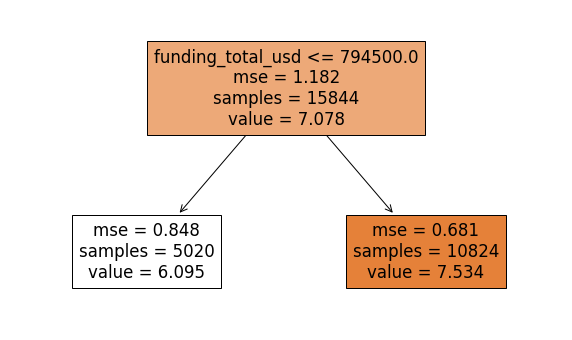

In [67]:
fig = plt.figure(figsize=(10, 6))
plot_tree(tree_1, feature_names=startups.columns[:-1], filled=True);

### Let's now try with a deeper model of depth 3

In [68]:
tree_3 = DTR(max_depth=3)

In [69]:
y_train[:15]

11075    7.0
15128    7.0
21322    7.0
17998    7.0
24582    6.0
3677     8.0
24178    8.0
29335    4.0
2732     6.0
14269    6.0
22748    8.0
21258    6.0
23845    9.0
24839    6.0
10903    7.0
Name: log_valuation, dtype: float64

In [71]:
tree_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [72]:
tree_3.predict(X_train[:15].values).round(2)

array([6.21, 7.82, 6.96, 7.82, 7.18, 8.55, 7.82, 5.2 , 5.2 , 7.82, 5.2 ,
       6.21, 7.18, 6.21, 7.15])

### Let's look at the errors...

In [73]:
mean_squared_error(
    y_true=y_train,
    y_pred=tree_3.predict(X_train)
).round(3)

0.461

In [74]:
mean_squared_error(
    y_true=y_test,
    y_pred=tree_3.predict(X_test)
).round(3)

0.471

### Looking better!

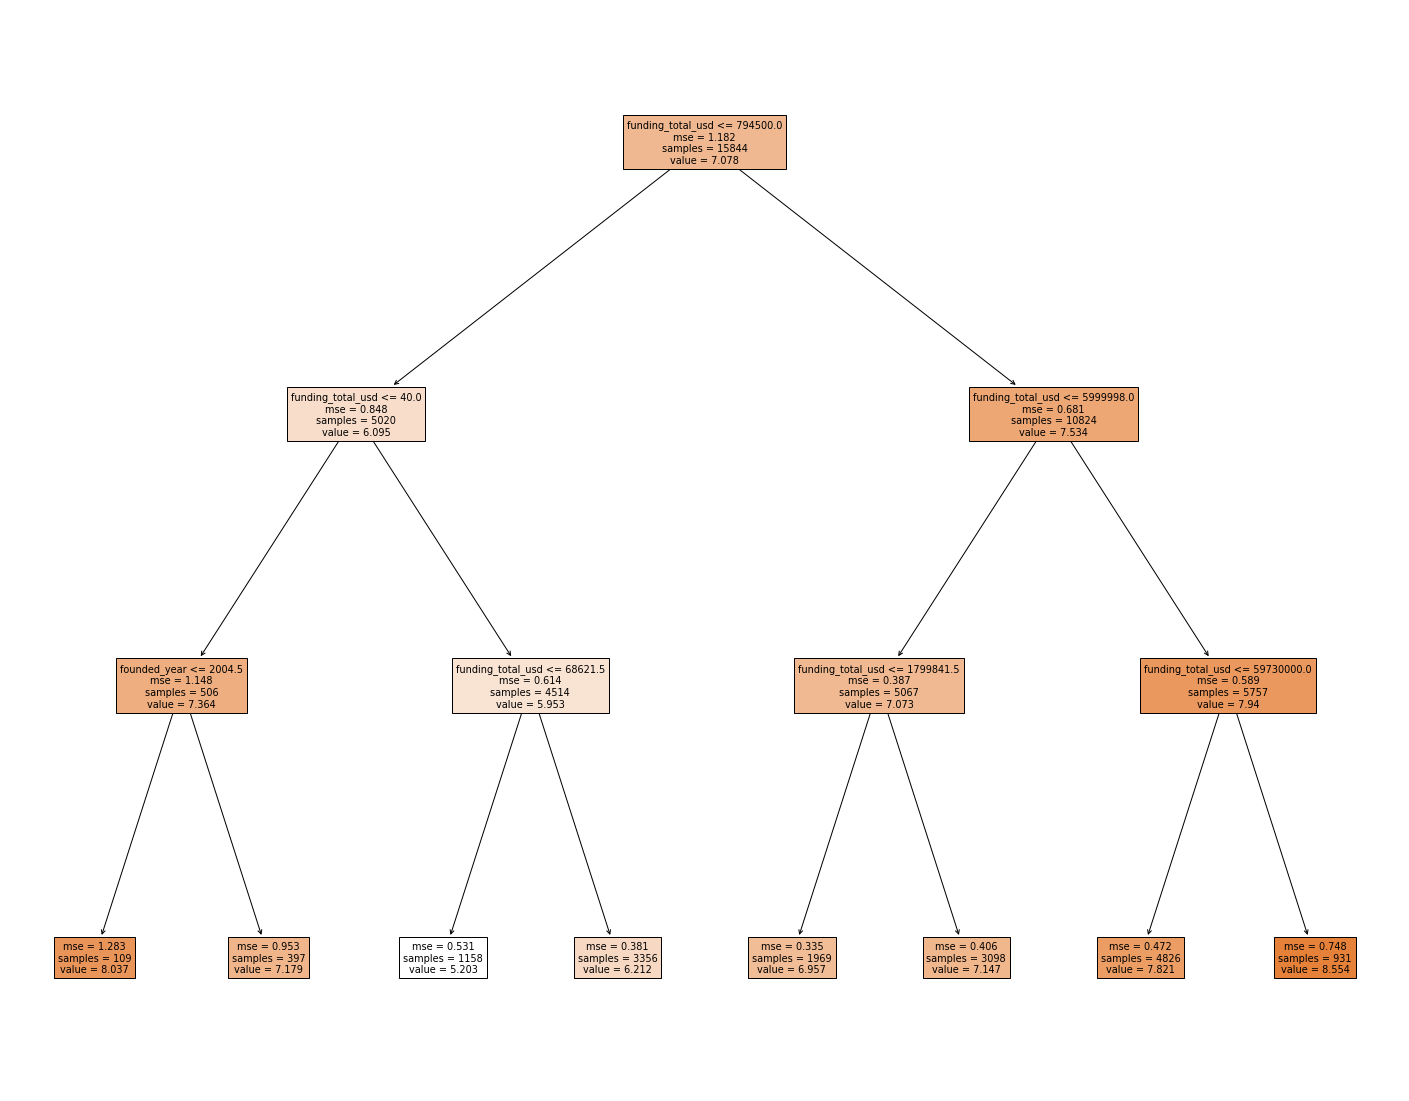

In [76]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree_3, feature_names=startups.columns[:-1], filled=True);

In [77]:
fig.savefig("tree_depth3.svg")

### Let's now look at a much more deeper tree of 20

In [78]:
tree_20 = DTR(max_depth=20)

In [79]:
tree_20.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

### Let's look at the errors...

In [80]:
mean_squared_error(
    y_true=y_train,
    y_pred=tree_20.predict(X_train)
)

0.03369372447389006

In [81]:
mean_squared_error(
    y_true=y_test,
    y_pred=tree_20.predict(X_test)
)

0.7718414582522616

### There's a clear case of overfitting in this case

### Let's analyse errors in training depending on depth

In [83]:
results = []

for depth in range(1, 21):
    tree = DTR(max_depth=depth)
    tree.fit(X_train, y_train)
    
    result = {
        "model": tree,
        "depth": depth,
        "train_error": mean_squared_error(y_train, tree.predict(X_train)),
        "test_error": mean_squared_error(y_test, tree.predict(X_test))
    }
    
    results.append(result)

In [84]:
results_df = pd.DataFrame(results)

In [85]:
results_df

,model,depth,train_error,test_error
0,DecisionTreeRegressor(max_depth=1),1,0.734203,0.719604
1,DecisionTreeRegressor(max_depth=2),2,0.549366,0.546348
2,DecisionTreeRegressor(max_depth=3),3,0.460825,0.470945
3,DecisionTreeRegressor(max_depth=4),4,0.435967,0.448742
4,DecisionTreeRegressor(max_depth=5),5,0.414601,0.434329
5,DecisionTreeRegressor(max_depth=6),6,0.397928,0.433328
6,DecisionTreeRegressor(max_depth=7),7,0.381929,0.439821
7,DecisionTreeRegressor(max_depth=8),8,0.362469,0.444440
8,DecisionTreeRegressor(max_depth=9),9,0.339345,0.445975
9,DecisionTreeRegressor(max_depth=10),10,0.310471,0.480573


### From the above table we can see that the optimal tree depth is 6, where the test error is at its minimum point

### Given that there are other hyperparameters we can adjust to train our models, let's find the optimal ones via Grid Search considering that the optimal depth is around 5 and 6

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
gs = GridSearchCV(
    estimator=DTR(),
    param_grid={
        "max_depth": [5, 6],
        "min_samples_split": [50, 100, 300, 1000],
        "max_features": [4, 6]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [88]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.432, test=-0.484) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.426, test=-0.454) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.519, test=-0.544) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.438, test=-0.450) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.543, test=-0.524) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.433, test=-0.460) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.593, test=-0.626) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.493, test=-0.512) total time=

[CV 3/5] END max_depth=6, max_features=6, min_samples_split=1000;, score=(train=-0.433, test=-0.438) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=6, min_samples_split=1000;, score=(train=-0.434, test=-0.444) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=6, min_samples_split=1000;, score=(train=-0.438, test=-0.420) total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 6],
                         'min_samples_split': [50, 100, 300, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

### We sort by performance...

In [89]:
grid_search_results = pd.DataFrame(gs.cv_results_)
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [90]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
14,6,6,300,-0.428390,-0.410767
13,6,6,100,-0.428608,-0.404567
5,5,6,100,-0.432529,-0.416711
12,6,6,50,-0.433882,-0.398939
6,5,6,300,-0.434674,-0.419935
4,5,6,50,-0.436700,-0.413155
15,6,6,1000,-0.442364,-0.433387
7,5,6,1000,-0.446128,-0.437846
10,6,4,300,-0.446377,-0.427722
9,6,4,100,-0.448681,-0.420704


### Good news! We have been able to reduce a bit more the test error with the best model, let's pick it out

In [91]:
best_tree = gs.best_estimator_

In [92]:
best_tree

DecisionTreeRegressor(max_depth=6, max_features=6, min_samples_split=300)

In [93]:
mean_squared_error(best_tree.predict(X_train), y_train)

0.4114596404087349

In [94]:
mean_squared_error(best_tree.predict(X_test), y_test)

0.43066250789893545

### Let's look at feature importance

In [96]:
feature_imp = pd.Series(best_tree.feature_importances_, index=startups.columns[:-1]).sort_values(ascending=False)

In [97]:
feature_imp

funding_total_usd                0.965371
funding_rounds                   0.021741
founded_year                     0.010059
delta_founded_vs_firstfunding    0.002829
log_valuation                    0.000000
country_ranking                  0.000000
dtype: float64

### It is very clear that the most important feature is the total funding received followed by very far by the total number of rounds

In [99]:
import seaborn as sns

<AxesSubplot:>

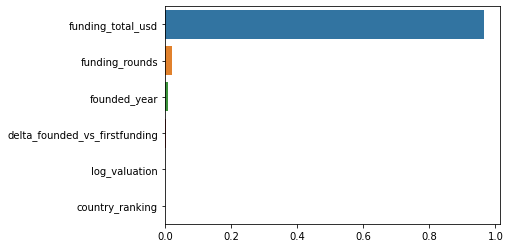

In [100]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

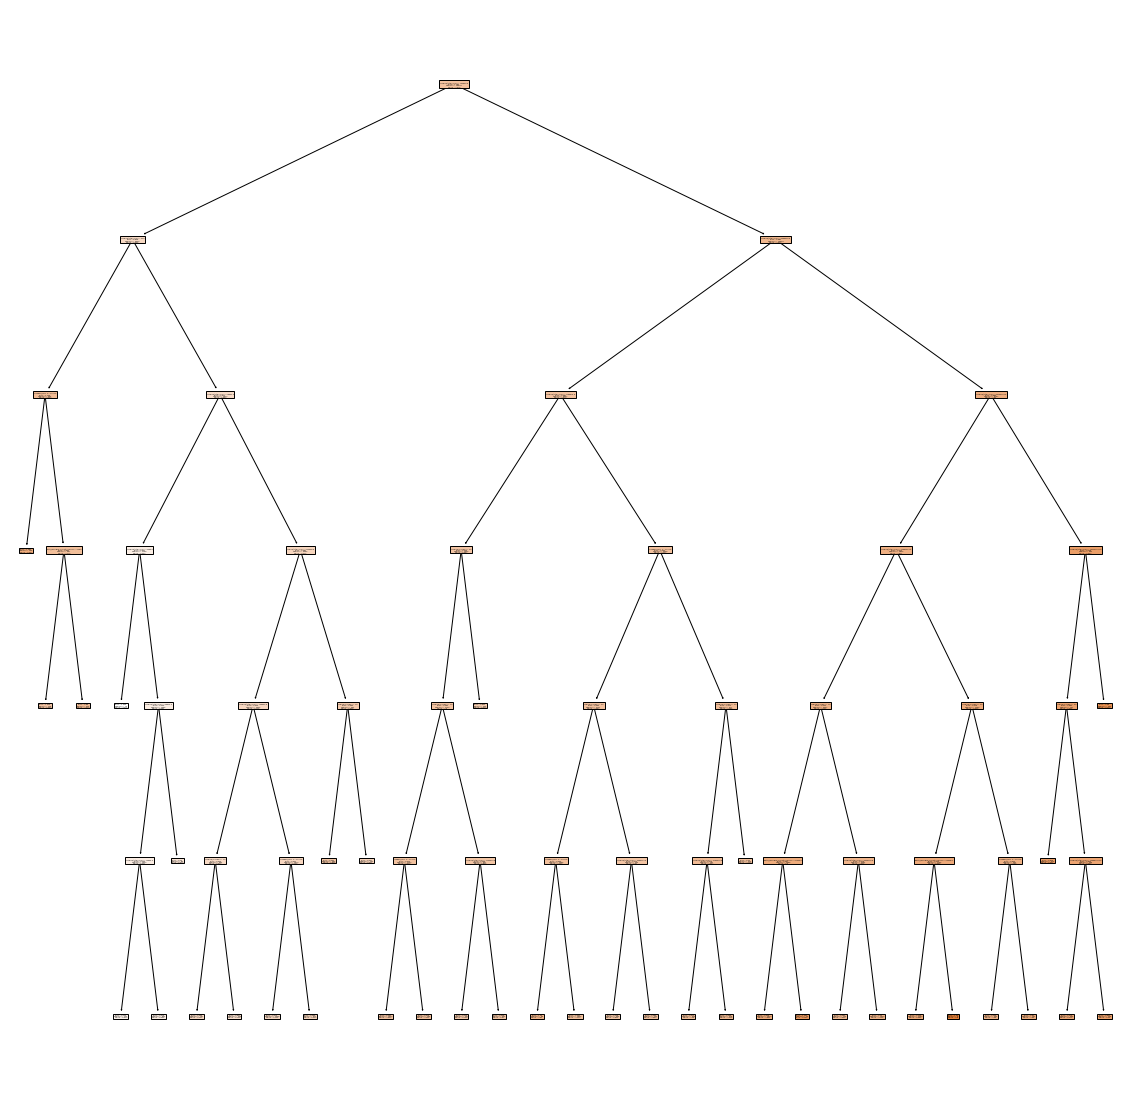

In [102]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=startups.columns[:-1], filled=True);

In [104]:
fig.savefig("decision_besttree.svg", facecolor="white")

### Let's look at a Decision Tree Classifier and then at random forest and look at their f3 score

In [109]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [110]:
tree_6 = DTC(max_depth=6)

In [111]:
tree_6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [144]:
tree_6_test_score = mean_squared_error(
    tree_6.predict(X_test),
    y_test
)

In [145]:
print(f"The test score with decision tree is {tree_6_test_score.round(3)}")

The test score with decision tree is 0.467


### Let's look at the random forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=6)

In [127]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=6, n_estimators=200)

In [146]:
rf_test_score = mean_squared_error(
    rf.predict(X_test),
    y_test
)

In [147]:
print(f"The test score with random forest is {rf_test_score.round(3)}")

The test score with random forest is 0.469


### Let's look at applying GridSearchCV to random forest

In [148]:
parameters = {'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 20, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [50, 100, 200, 500],
 'min_samples_split': [100, 200, 400],
 'n_estimators': [400, 600, 800]}

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
rfc = RandomForestClassifier()

In [152]:
grid = GridSearchCV(rfc, parameters, verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


/home/alvarogb/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 20, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [50, 100, 200, 500],
                         'min_samples_split': [100, 200, 400],
                         'n_estimators': [400, 600, 800]},
             verbose=1)

In [153]:
print(grid.best_params_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 600}


In [154]:
rfc_params = RandomForestClassifier(n_estimators =  600, bootstrap = False, max_depth = 10, max_features = 'sqrt', min_samples_leaf = 50, min_samples_split = 100 ) 

In [155]:
rfc_params.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_leaf=50, min_samples_split=100,
                       n_estimators=600)

In [156]:
y_pred_rfc = rfc_params.predict(X_test)

In [157]:
rfc_best_test_score = mean_squared_error(
    rfc_params.predict(X_test),
    y_test
)

In [159]:
print(f"The test score with random forest is {rfc_best_test_score.round(3)}")

The test score with random forest is 0.531


### The best model in terms of lower test MSE is the best_tree selected previously, let's save it down to use it in Streamlit

In [160]:
import pickle

In [162]:
pickle.dump(best_tree, open("Startup_model", 'wb'))

### Let's try loading it and predicting to check it works

In [163]:
loaded_model = pickle.load(open("Startup_model", 'rb'))

In [164]:
loaded_model.predict(X_test)[:25]

array([5.79574468, 7.11308068, 5.25492468, 6.14506173, 7.11308068,
       7.70580561, 7.68      , 6.12153236, 6.64435146, 7.44495413,
       6.12153236, 8.08173913, 7.31325301, 8.08173913, 7.27992634,
       7.39839572, 7.31325301, 6.14506173, 6.76811594, 8.08173913,
       7.70580561, 7.39839572, 7.70580561, 5.25492468, 7.11308068])

### We are done here, now, we will use it to import in our streamlit file in order to predict valuation based on user input

In [166]:
startups.dtypes

funding_total_usd                  int64
funding_rounds                   float64
founded_year                     float64
delta_founded_vs_firstfunding    float64
log_valuation                    float64
country_ranking                    int64
market_ranking                     int64
dtype: object